In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jockeroika/human-bone-fractures-image-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'human-bone-fractures-image-dataset' dataset.
Path to dataset files: /kaggle/input/human-bone-fractures-image-dataset


In [3]:
import os
dataset_path = path  # from kagglehub
print(os.listdir(dataset_path))

['Human Bone Fractures Multi-modal Image Dataset (HBFMID)']


In [4]:
for dirname, _, filename in os.walk('/kaggle/input'):
  print(dirname)

/kaggle/input
/kaggle/input/human-bone-fractures-image-dataset
/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)
/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection
/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid
/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/labels
/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/images
/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test
/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test/labels
/ka

In [6]:
!pip -q install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.2 MB/s eta 0:00:00


In [7]:
from ultralytics import YOLO

model = YOLO('yolo11m.pt')
model.train(data='/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/data.yaml',
            epochs = 30,
            imgsz=640,
            device=0)

Ultralytics 8.3.195 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimiz

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f6d2e9f91f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [8]:
!cat "/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/data.yaml"

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 10
names: ['Comminuted', 'Greenstick', 'Healthy', 'Linear', 'Oblique Displaced', 'Oblique', 'Segmental', 'Spiral', 'Transverse Displaced', 'Transverse']

roboflow:
  workspace: iubat-i4ldm
  project: bon-fracture-detection
  version: 2
  license: Private
  url: https://app.roboflow.com/iubat-i4ldm/bon-fracture-detection/2

In [9]:
metrics = model.val()
print(f"mAP50-95: {metrics.box.map:.4f}")
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"Precision: {metrics.box.p.mean():.4f}")
print(f"Recall: {metrics.box.r.mean():.4f}")
print(f"F1-score:{metrics.box.f1.mean():.4f}")

Ultralytics 8.3.195 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,037,742 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.9±0.2 ms, read: 40.9±19.5 MB/s, size: 30.3 KB)
val: Scanning /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/labels... 128 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 128/128 342.5it/s 0.4s
WARNING ⚠️ val: Cache directory /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 1.5it/s 5.3s
                   all        128        157      0.856      0.828      0.869      0.446
            Comminuted         15         15      0.957        0.8      0.808      0.493
      

In [17]:
import cv2
import matplotlib.pyplot as plt
import os

def detect_img(image_path):
  results = model.predict(source=image_path, conf=0.5, save=True)
  # Construct the correct path to the saved image
  predicted_image_path = os.path.join(results[0].save_dir, os.path.basename(image_path))
  predicted_image = cv2.cvtColor(cv2.imread(predicted_image_path), cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(8, 6))
  plt.imshow(predicted_image)
  plt.axis('off')
  plt.show()


image 1/1 /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test/images/112_jpg.rf.2acc6f0c9698a23203d4ce1053142006.jpg: 640x640 1 Transverse Displaced, 37.0ms
Speed: 2.3ms preprocess, 37.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/train11


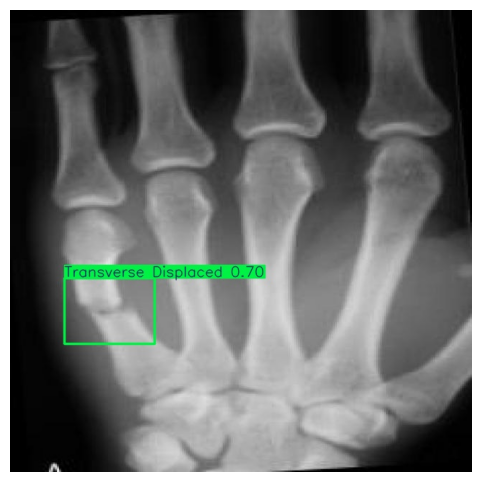


image 1/1 /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test/images/101_jpg.rf.92e32f9dfb9b34f9a123b16629cc368d.jpg: 640x640 (no detections), 37.0ms
Speed: 2.1ms preprocess, 37.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/train12


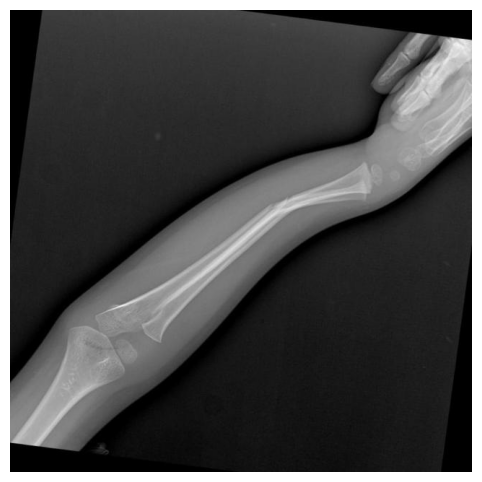


image 1/1 /kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test/images/210_jpg.rf.d032055fe1f23f1ada7615d73488b92f.jpg: 640x640 1 Oblique, 37.0ms
Speed: 2.2ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/train13


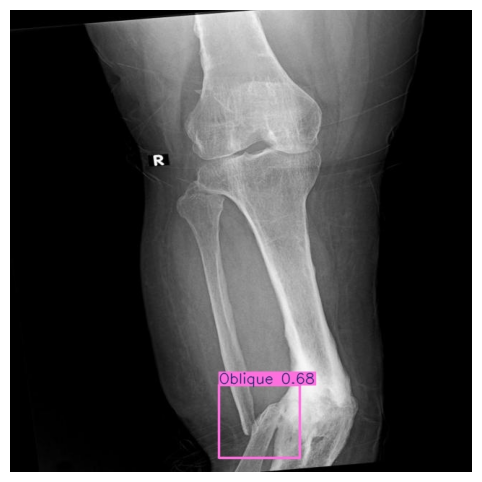

In [18]:
detect_img('/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test/images/112_jpg.rf.2acc6f0c9698a23203d4ce1053142006.jpg')
detect_img('/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test/images/101_jpg.rf.92e32f9dfb9b34f9a123b16629cc368d.jpg')
detect_img('/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test/images/210_jpg.rf.d032055fe1f23f1ada7615d73488b92f.jpg')